In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt 

In [2]:
file_path = r"C:\Users\Garba Buhari\Desktop\breast cancer prediction\breast-cancer.csv"
data = pd.read_csv(file_path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
def clean_line(line):
    return line.strip()

with open(file_path,'r')as file, open('clean_data', 'w')as cleaned_file:
    for line in file:
        cleaned_line = clean_line(line)
        cleaned_file.write(cleaned_line + '\n')
print("cleaning complete cleaned_file saved to :", 'clean_data.csv')

cleaning complete cleaned_file saved to : clean_data.csv


In [4]:
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

In [5]:
x = data.drop(columns = ['diagnosis'], axis = 1)
y = data['diagnosis']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import pandas as pd


imputer = IterativeImputer()


x_train_imputed = imputer.fit_transform(x_train)
x_train_imputed = pd.DataFrame(x_train_imputed, columns=x_train.columns)

x_test_imputed = imputer.transform(x_test) 
x_test_imputed = pd.DataFrame(x_test_imputed, columns=x_test.columns)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

model = LogisticRegression(C = 0.1)
model.fit(x_train_scaled, y_train)

scores = cross_val_score(model, x_train_scaled, y_train, cv= 5)
print(f"cross-validated-scores:", scores)


cross-validated-scores: [0.98901099 0.96703297 0.98901099 0.96703297 0.94505495]


In [8]:
y_pred = model.predict(x_test_scaled)  
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy_score:", accuracy)


accuracy_score: 0.9824561403508771


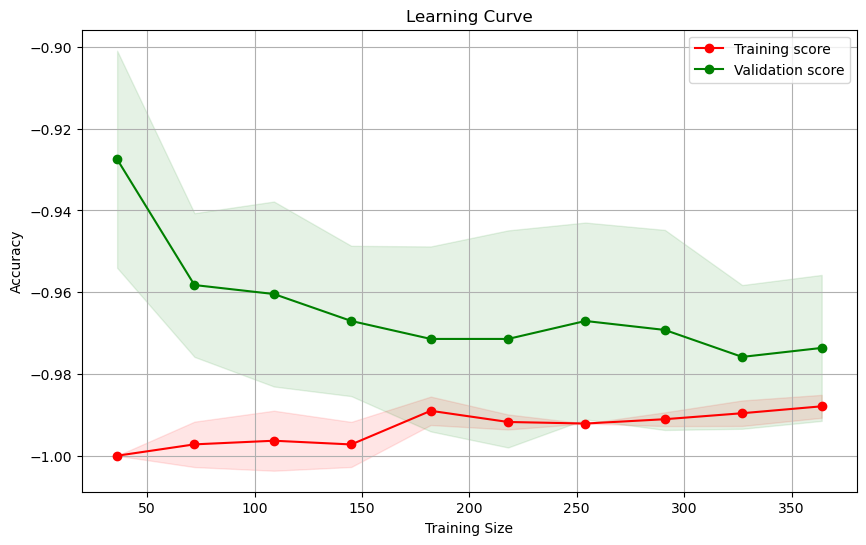

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import HistGradientBoostingRegressor
import numpy as np


model = LogisticRegression()


train_sizes, train_scores, test_scores = learning_curve(model, 
                                                        x_train_scaled, 
                                                        y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        scoring='accuracy')


train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation score')


plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color='red')
plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()


In [19]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

breast_cancer = pd.DataFrame({
    'id': [89742801],
    'diagnosis': ['M'],
    'radius_mean': [17.06],
    'texture_mean': [21],
    'perimeter_mean': [111.8],
    'area_mean': [918.6],
    'smoothness_mean': [0.1119],
    'compactness_mean': [0.1056],
    'concavity_mean': [0.1508],
    'concave points_mean': [0.09934],
    'symmetry_mean': [0.1727],
    'fractal_dimension_mean': [0.06071],
    'radius_se': [0.8161],
    'texture_se': [2.129],
    'perimeter_se': [6.076],
    'area_se': [87.17],
    'smoothness_se': [0.006455],
    'compactness_se': [0.01797],
    'concavity_se': [0.04502],
    'concave points_se': [0.01744],
    'symmetry_se': [0.01829],
    'fractal_dimension_se': [0.003733],
    'radius_worst': [20.99],
    'texture_worst': [33.15],
    'perimeter_worst': [143.2],
    'area_worst': [1362],
    'smoothness_worst': [0.1449],
    'compactness_worst': [0.2053],
    'concavity_worst': [0.392],
    'concave points_worst': [0.1827],
    'symmetry_worst': [0.2623],
    'fractal_dimension_worst': [0.07599]
})


model.fit(x_train_scaled, y_train)


X_new = breast_cancer.drop(['diagnosis'], axis=1)  
X_new_scaled = scaler.transform(X_new)


probabilities = model.predict_proba(X_new_scaled)

if probabilities[0][1] > 0.4 :  
    print("Malignant (M)")
else:
    print("Benign (B)")


Malignant (M)
